# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file   = 'train.p'
validation_file = 'valid.p'
testing_file    = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
n_train = X_train.shape[0]
n_validation = X_valid.shape[0]
n_test = X_test.shape[0]
image_shape = X_train.shape[1:]
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import pandas as pd
import tensorflow as tf

def Grayscale(img, Channel = 'RGB'):
    """
    Converts color img to grayscale
    """
    if Channel is 'BGR':
        imgOut = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    elif Channel is 'RGB':
        imgOut = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    else:
        assert(0) # not a valid color channel
        
    return imgOut[...,None]
 
    
def EqualizeHistogram(img):

    return cv2.equalizeHist(img)


def ImgToEqualizedHist(img):    
        
    img_copy = np.copy(img) # do not want to change source image
        
    for Channel in range(img.shape[2]):
        img_copy[...,Channel] = EqualizeHistogram(img[...,Channel])
        
    return img_copy    


def GeneralEqualizeHist(img, ApplyGrayScale):
        
    if ApplyGrayScale:
        return EqualizeHistogram(Grayscale(img, 'RGB'))[...,np.newaxis]
    else:        
        img_copy = np.copy(img) # do not want to change source image
        
        for Channel in range(img.shape[2]):
            img_copy[...,Channel] = EqualizeHistogram(img[...,Channel])
        
        return img_copy    


def NormalizeImg(img):    
    return (img-128.)/128.


CSV_Labels = pd.read_csv('signnames.csv') # to prevent having to reread CSV file all the time
def GetLabelString(Label):
    return CSV_Labels['SignName'][Label]

def ShowImgAndLabelWithProcessed(Images, Labels, WhichLabel, kImages):
    '''
    Plots kImages of WhichLabel from Images in a row
    '''
    plt.figure(figsize=(14,4))
        
    ImagesView  = Images[Labels == WhichLabel]
    RandIndices = np.random.randint(0, ImagesView.shape[0], size = kImages)
    
    for i in range(kImages):
        
        selected_Img          = ImagesView[RandIndices[i],...]
        RGB_EqualizedHist_Img = GeneralEqualizeHist(selected_Img, ApplyGrayScale=False)
        EqualizedHist_Img     = GeneralEqualizeHist(selected_Img, ApplyGrayScale=True).squeeze()
        
        
        # show original image
        plt.subplot(3, kImages, i+1) # because of 1 indexing        
        plt.imshow(selected_Img)
        plt.axis('off')
        
        # show colored equalized histogram
        plt.subplot(3, kImages, i+kImages+1) # because of 1 indexing
        plt.imshow(RGB_EqualizedHist_Img)
        plt.axis('off')  
        
        # show equalized histogram
        plt.subplot(3, kImages, i+2*kImages+1) # because of 1 indexing
        plt.imshow(EqualizedHist_Img, cmap = 'gray')
        plt.axis('off')                  
    
    plt.suptitle('{}'.format(GetLabelString(WhichLabel)))
    plt.show()
        
    return ImagesView.shape[0]

### Visualize selected classes under
1. **Row1** Original image
2. **Row2** Histogram equalized
3. **Row3** Grayscaled and then Histogram equalized
4. Plot Histogram

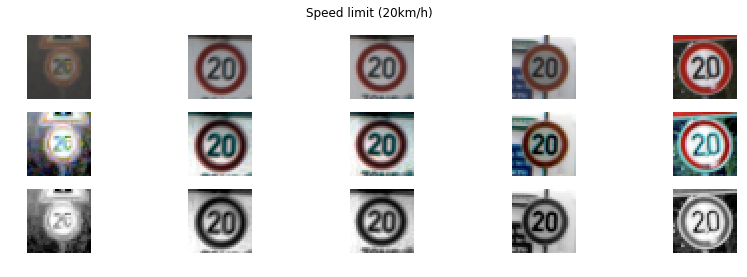

Label  0: has 180 per 34799 ( 0.52%)


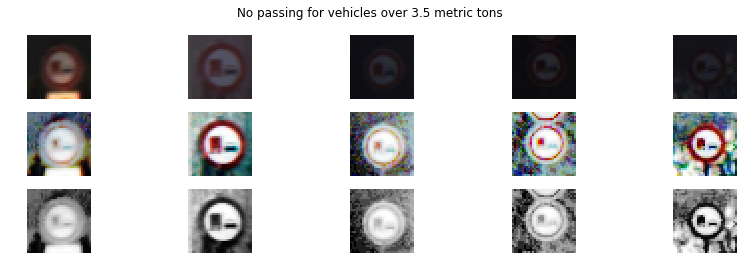

Label 10: has 1800 per 34799 ( 5.17%)


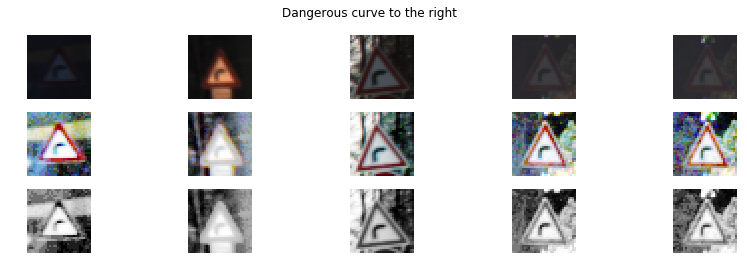

Label 20: has 300 per 34799 ( 0.86%)


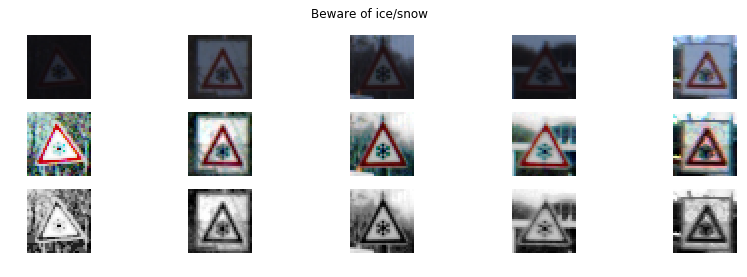

Label 30: has 390 per 34799 ( 1.12%)


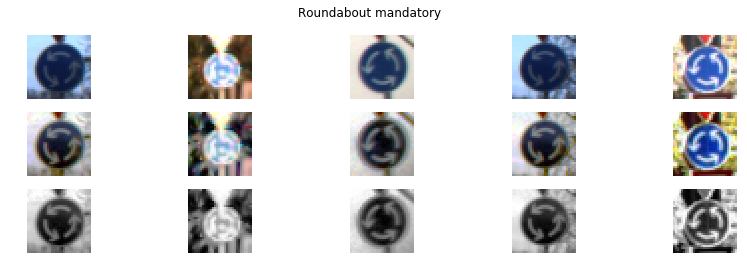

Label 40: has 300 per 34799 ( 0.86%)


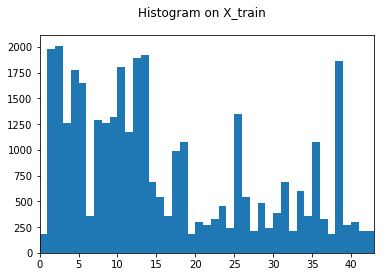

In [4]:
# Visualize

for i in range(0, n_classes, 10):
    kOfClass_i = ShowImgAndLabelWithProcessed(X_train, y_train, i, 5)
    print ('Label {0:>2}: has {1} per {2} ({3:5.2f}%)'.format(i, \
        kOfClass_i, n_train, 100*float(kOfClass_i)/float(n_train)))
    
# histogram of training labels

plt.hist(y_train, n_classes, [0, n_classes])
plt.xlim([0, n_classes])
plt.suptitle('Histogram on X_train')
plt.show()

#### Steps used to pre-process Data Set

First we observe that input image are often uniformly dark or uniformly bright. Allowing us to achieve contrast normalization well using non adaptive histogram equalization.

Image preprocessing in the cell above shows that given the task at hand of classifying well bounded 32x32 image, colorized image does not seem to provide materially useful information compared to grayscale (although I didn't test this, Sermanet and LeCun's Traffic Sign Recognition with Multi-Scale Convolutional Networks showed that grayscale performs better than non-normalized color channel in Table III of said paper). Hence we decided the following 

1. Grayscale image
2. Equalize histogram
3. Normalize image

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Augment Data

In [5]:
import tensorflow as tf
import pickle
import cv2
from random import randint, uniform

def GetVertices(imgshape, pt):
    # Returns a trapeziod based on extra pixel of width and height of image size
    
    nrow, ncol = imgshape[:2]
    
    pts1       = (int(-pt)      , int(-pt      ))
    pts2       = (int(ncol + pt), int(-pt      ))
    pts3       = (int(ncol + pt), int(nrow + pt))
    pts4       = (int(-pt)      , int(nrow + pt))

    return np.float32([pts1, pts2, pts3, pts4])  


def rotateImg(img, rndAngle):
    
  rows    = img.shape[0]
  cols    = img.shape[1]  
  angle   = randint(-rndAngle, rndAngle)
  M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
  return cv2.warpAffine(img, M, (cols, rows))

def scaleImg(img, rndPixel):
  # scale image larger or smaller by number of pixel from rndRange, maintains img shape by padding with zero if shrinking
  
  rows     = img.shape[0]
  cols     = img.shape[1]
  offset   = randint(-rndPixel, rndPixel)
  M        = cv2.getPerspectiveTransform(GetVertices(img.shape, offset), GetVertices(img.shape, 0))
  return cv2.warpPerspective(img, M, (rows, cols))


def AugmentData(Data, Labels, kTarget = 1000):
  # returns Data and Labels augmented with extra Randomly rotated and scaled imgs
  # kTarget is minimum number of samples desired for each class
    
  return RotateAndScale(Data, Labels, kTarget)


def RotateAndScale(Data, Labels, kTarget):
    # Randomly rotate and scale imgs and return Data and Labels with those additional images
  
  NewImgs       = []
  NewLabels     = []
  for i in set(Labels):
    class_indices = np.where(Labels == i)
    class_count   = len(class_indices[0])
    shortfall     = kTarget - class_count    
    while (shortfall > 0):
      for j in range(min(shortfall, class_count)):
        NewImgs.append(scaleImg(rotateImg(Data[class_indices[0][j]], rndAngle = 20), rndPixel = 2))
        NewLabels.append(i)
        shortfall -= 1
        if shortfall is 0:
          break
        
  return np.concatenate((Data  , np.array(NewImgs  )), axis=0), \
         np.concatenate((Labels, np.array(NewLabels)), axis=0)

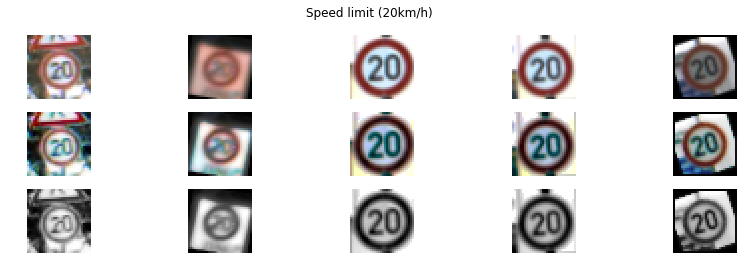

Label  0: has 1000 per 51690 ( 1.93%)


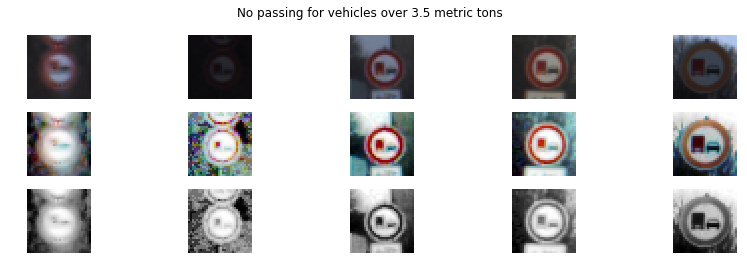

Label 10: has 1800 per 51690 ( 3.48%)


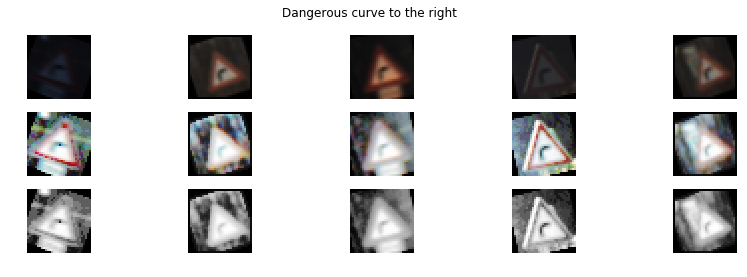

Label 20: has 1000 per 51690 ( 1.93%)


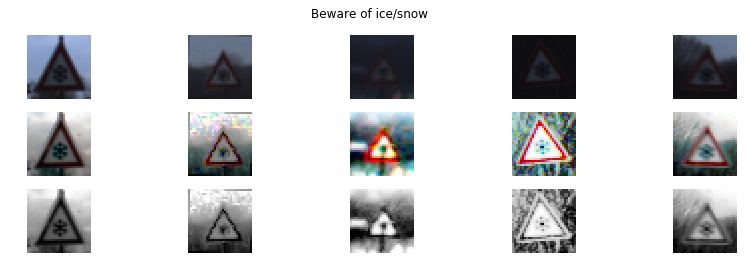

Label 30: has 1000 per 51690 ( 1.93%)


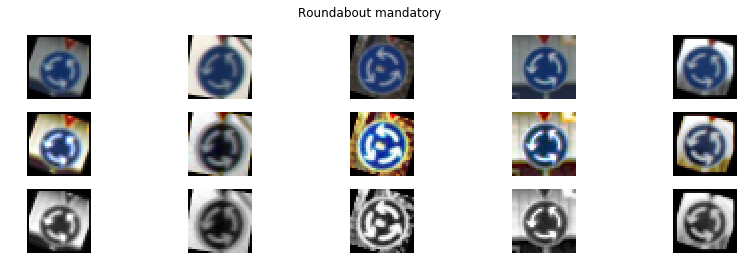

Label 40: has 1000 per 51690 ( 1.93%)


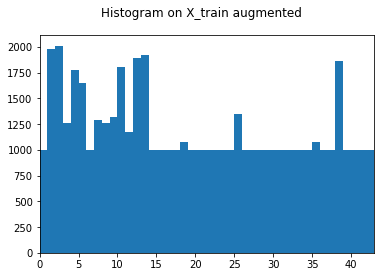

In [6]:
X_train, y_train = AugmentData(X_train, y_train)
n_train          = X_train.shape[0] # update n_train after augmenting data


# verify still correct image to label indexing
for i in range(0, n_classes, 10):
    kOfClass_i = ShowImgAndLabelWithProcessed(X_train, y_train, i, 5)
    print ('Label {0:>2}: has {1} per {2} ({3:5.2f}%)'.format(i, \
        kOfClass_i, n_train, 100*float(kOfClass_i)/float(n_train)))
    
# histogram of training labels

plt.hist(y_train, n_classes, [0, n_classes])
plt.xlim([0, n_classes])
plt.suptitle('Histogram on X_train augmented')
plt.show()

### Model Architecture

In [8]:
def conv2d(x, W, b, strides=1, padding = 'VALID'):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2, padding = 'SAME'):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding=padding)

def PlotLearningCurve(Label, TrainingOutputs, ValidationOutputs, SaveFileName = None, Title = None):
    Epochs = len(TrainingOutputs)
    assert(Epochs == len(ValidationOutputs))
    Epochs = np.arange(Epochs)
    plt.plot(Epochs, TrainingOutputs, label = 'Training')
    plt.plot(Epochs, ValidationOutputs, label = 'Validation')
    plt.ylabel(Label)
    plt.xlabel('Epoch')
    plt.suptitle(Title)
    plt.legend()    
    
    if (SaveFileName is not None):
        plt.savefig(SaveFileName.replace(' ', '_'))
        
    plt.show()
    
def LeNet(x, n_output, dropout):
    '''This is a modified LeNet framework. The main changes we made
    were the size of the final few fully connected layers.
       
    References:
    LeCun, Bottou, Bengio, and Haffner - Gradient-Based Learning Applied to Document Recognition
    http://ieeexplore.ieee.org/document/726791/
    '''
    
    mu = 0
    sigma = 0.05
    
    # Store layers weight & bias
    weights = {
        'wc1': tf.Variable(tf.truncated_normal(shape = (5, 5, 3, 6)    , mean = mu, stddev = sigma)),
        'wc2': tf.Variable(tf.truncated_normal(shape = (5, 5, 6,16)    , mean = mu, stddev = sigma)),
        'wd1': tf.Variable(tf.truncated_normal(shape = (400,  1024)    , mean = mu, stddev = sigma)),
        'wd2': tf.Variable(tf.truncated_normal(shape = (1024, 1024)    , mean = mu, stddev = sigma)),
        'out': tf.Variable(tf.truncated_normal(shape = (1024, n_output), mean = mu, stddev = sigma)),
    }
    
    biases = {
        'bc1': tf.Variable(tf.zeros(6)),
        'bc2': tf.Variable(tf.zeros(16)),
        'bd1': tf.Variable(tf.zeros(1024)),
        'bd2': tf.Variable(tf.zeros(1024)),
        'out': tf.Variable(tf.zeros(n_output))
    }
    
    # Layer 1a - 32*32*1 to 28*28*6
    conv1 = conv2d(x, weights['wc1'], biases['bc1'], strides = 1, padding = 'VALID')
    # Layer 1b - 28*28*6 to 14*14*6
    conv1 = maxpool2d(conv1, k=2, padding = 'SAME')

    # Layer 2a - 14*14*6 to 10*10*16
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'], strides = 1, padding = 'VALID')
    # Layer 2b - 10*10*16 to 5*5*16
    conv2 = maxpool2d(conv2, k=2, padding = 'SAME')

    # Fully connected layer - (5*5*16) 400 to 1024
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout)

    # Fully connected layer - 1024 to 1024    
    fc2 = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'])
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, dropout)

    # Output Layer - class prediction - 1024 to 43
    out = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
    return out, weights


def LeNet2(x, n_output, dropout):
    '''The referenced paper is mainly used as inspiration in introducing a 
    2-stage ConvNet (using connections that skip layers). The network structure itself
    is still similar to LeNet above, with the wc2 layer additionally concatenated directly
    to the final fully connected layer

    References:
    Sermanet, and LeCun - Traffic Sign Recognition with Multi-Scale Convolutional Networks, July 2011
    http://ieeexplore.ieee.org/abstract/document/6033589/
    '''    
    
    mu = 0
    sigma = 0.05
    
    # Store layers weight & bias
    weights = {
        'wc1': tf.Variable(tf.truncated_normal(shape = (5, 5, 3, 6)    , mean = mu, stddev = sigma)),
        'wc2': tf.Variable(tf.truncated_normal(shape = (5, 5, 6,16)    , mean = mu, stddev = sigma)),
        'wd1': tf.Variable(tf.truncated_normal(shape = (400,  1024)    , mean = mu, stddev = sigma)),
        'wd2': tf.Variable(tf.truncated_normal(shape = (1024, 1024)    , mean = mu, stddev = sigma)),
        'out': tf.Variable(tf.truncated_normal(shape = (1424, n_output), mean = mu, stddev = sigma)),
    }
    
    biases = {
        'bc1': tf.Variable(tf.zeros(6)),
        'bc2': tf.Variable(tf.zeros(16)),
        'bd1': tf.Variable(tf.zeros(1024)),
        'bd2': tf.Variable(tf.zeros(1024)),
        'out': tf.Variable(tf.zeros(n_output))
    }
    
    # Layer 1a - 32*32*1 to 28*28*6
    conv1 = conv2d(x, weights['wc1'], biases['bc1'], strides = 1, padding = 'VALID')
    # Layer 1b - 28*28*6 to 14*14*6
    conv1 = maxpool2d(conv1, k=2, padding = 'SAME')

    # Layer 2a - 14*14*6 to 10*10*16
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'], strides = 1, padding = 'VALID')
    # Layer 2b - 10*10*16 to 5*5*16
    conv2 = maxpool2d(conv2, k=2, padding = 'SAME')
    
    flatten_stage1 = tf.contrib.layers.flatten(conv2)

    # Fully connected layer - (5*5*16) 400 to 1024
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout)

    # Fully connected layer - 1024 to 1024    
    fc2 = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'])
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, dropout)

    flatten_stage2 = tf.contrib.layers.flatten(fc2)
    
    # Fully connected layer - stage 1 flatten + stage 2 flatten
    # (5x5x16 => 400) + (1024) = 1424
    fc3 = tf.concat([flatten_stage1, flatten_stage2], 1)
    fc3 = tf.nn.dropout(fc3, dropout)
    
    # Output Layer - class prediction - 1424 to 43
    out = tf.add(tf.matmul(fc3, weights['out']), biases['out'])
    return out, weights


def VGG6(x, n_output, dropout):
    ''' Modified ConvNet configuration B from Simonyan, Zisserman. We removed last four 
    convolution layers because our image started in size 32*32 instead of 224*224
    
    References:
    Simonyan, Zisserman - Very Deep Convolutional Networks for Large-Scale Image Recognition
    arxiv - https://arxiv.org/abs/1409.1556
    
    '''    
    
    mu = 0
    sigma = 0.05
    
    # Store layers weight & bias
    weights = {
        'wc1' : tf.Variable(tf.truncated_normal(shape = (3, 3,   3,  64), mean = mu, stddev = sigma)),
        'wc2' : tf.Variable(tf.truncated_normal(shape = (3, 3,  64,  64), mean = mu, stddev = sigma)),
        'wc3' : tf.Variable(tf.truncated_normal(shape = (3, 3,  64, 128), mean = mu, stddev = sigma)),
        'wc4' : tf.Variable(tf.truncated_normal(shape = (3, 3, 128, 128), mean = mu, stddev = sigma)),
        'wc5' : tf.Variable(tf.truncated_normal(shape = (3, 3, 128, 256), mean = mu, stddev = sigma)),
        'wc6' : tf.Variable(tf.truncated_normal(shape = (3, 3, 256, 256), mean = mu, stddev = sigma)),        
        'wd1' : tf.Variable(tf.truncated_normal(shape = (4096, 4096)    , mean = mu, stddev = sigma)),
        'wd2' : tf.Variable(tf.truncated_normal(shape = (4096, 4096)    , mean = mu, stddev = sigma)),
        'wd3' : tf.Variable(tf.truncated_normal(shape = (4096, 1000)    , mean = mu, stddev = sigma)),        
        'out' : tf.Variable(tf.truncated_normal(shape = (1000, n_output), mean = mu, stddev = sigma)),
    }
    
    biases = {
        'bc1': tf.Variable(tf.zeros( 64)),
        'bc2': tf.Variable(tf.zeros( 64)),
        'bc3': tf.Variable(tf.zeros(128)),
        'bc4': tf.Variable(tf.zeros(128)),
        'bc5': tf.Variable(tf.zeros(256)),
        'bc6': tf.Variable(tf.zeros(256)),        
        'bd1': tf.Variable(tf.zeros(4096)),
        'bd2': tf.Variable(tf.zeros(4096)),
        'bd3': tf.Variable(tf.zeros(1000)),
        'out': tf.Variable(tf.zeros(n_output))
    }
    
    # Layer 1 - 32*32*3 to 32*32*64
    conv1 = conv2d(x, weights['wc1'], biases['bc1'], strides = 1, padding = 'SAME')
    conv1 = tf.nn.relu(conv1)
    # Layer 2 - 32*32*64 to 32*32*64
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'], strides = 1, padding = 'SAME')
    conv2 = tf.nn.relu(conv2)
    # Layer 2b - 32*32*64 to 16*16*64
    conv2 = maxpool2d(conv2, k=2, padding = 'SAME')    


    # Layer 3 - 16*16*64 to 16*16*128
    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'], strides = 1, padding = 'SAME')
    conv3 = tf.nn.relu(conv3)
    # Layer 4 - 16*16*128 to 16*16*128
    conv4 = conv2d(conv3, weights['wc4'], biases['bc4'], strides = 1, padding = 'SAME')
    conv4 = tf.nn.relu(conv4)
    # Layer 4b - 16*16*128 to 8*8*128
    conv4 = maxpool2d(conv4, k=2, padding = 'SAME')
    
    # Layer 5 - 8*8*128 to 8*8*256
    conv5 = conv2d(conv4, weights['wc5'], biases['bc5'], strides = 1, padding = 'SAME')
    conv5 = tf.nn.relu(conv5)
    # Layer 6 - 8*8*256 to 8*8*256
    conv6 = conv2d(conv5, weights['wc6'], biases['bc6'], strides = 1, padding = 'SAME')
    conv6 = tf.nn.relu(conv6)
    # Layer 6b - 8*8*256 to 4*4*256
    conv6 = maxpool2d(conv6, k=2, padding = 'SAME')
    
    # Fully connected layer - 4096 to 4096
    fc1 = tf.contrib.layers.flatten(conv6)
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout)
    
    # Fully connected layer - 4096 to 4096
    fc2 = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'])
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, dropout)    

    # Fully connected layer - 4096 to 1024
    fc3 = tf.add(tf.matmul(fc2, weights['wd3']), biases['bd3'])
    fc3 = tf.nn.relu(fc3)
    fc3 = tf.nn.dropout(fc3, dropout)    

    # Fully connected layer - 1024 to 43
    out = tf.add(tf.matmul(fc3, weights['out']), biases['out'])
    
    return out, weights

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [9]:
# prep data by taking input through graysccale, histogram equalizer, normalize
X_train_prep = np.zeros((n_train, *image_shape), dtype=float)

for i in range(n_train):    
    X_train_prep[i] = NormalizeImg(GeneralEqualizeHist(X_train[i,...], ApplyGrayScale=False))
    
X_valid_prep = np.zeros((n_validation, *image_shape), dtype=float)
for i in range(n_validation):
    X_valid_prep[i] = NormalizeImg(GeneralEqualizeHist(X_valid[i,...], ApplyGrayScale=False))

X_test_prep = np.zeros((n_test, *image_shape), dtype=float)
for i in range(n_test):
    X_test_prep[i] = NormalizeImg(GeneralEqualizeHist(X_test[i,...], ApplyGrayScale=False))

# shuffle and split to train and validation    
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train_prep, y_train = shuffle(X_train_prep, y_train, random_state = 0)

In [10]:
# Parameters
learning_rate = 0.0005
EPOCHS        = 40
BATCH_SIZE    = 128

# Number of samples to calculate validation and accuracy
# Decrease this if you're running out of memory to calculate accuracy
test_valid_size = 256

# Network Parameters
dropout = 0.5  # Dropout, probability to keep units
L2_beta = 0.001

# tf Graph input
x = tf.placeholder(tf.float32, (None, 32, 32, 3), name = 'placeholder_x')
y = tf.placeholder(tf.int32,   (None), name = 'placeholder_y')
one_hot_y = tf.one_hot(y, n_classes)    
keep_prob = tf.placeholder(tf.float32)

In [11]:
# Model
ModelName = 'vgg6 40e 0.001b 0.0005l'
logits, Weights = VGG6(x, n_classes, dropout)

In [13]:
# Define loss and optimizer
cost      = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y))
cost      = cost + L2_beta * tf.add_n([tf.nn.l2_loss(Weights[each]) for each in Weights])

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver              = tf.train.Saver()

In [14]:
def Evaluate(X_samples, y_labels):
    n_samples      = len(y_labels)
    total_loss     = 0
    total_accuracy = 0
    for offset in range(0, n_samples, BATCH_SIZE):
        batch_x, batch_y = X_samples[offset:offset+BATCH_SIZE], y_labels[offset:offset+BATCH_SIZE]        
        loss, accuracy   = sess.run([cost, accuracy_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})            
        total_loss     += (loss     * len(batch_y))
        total_accuracy += (accuracy * len(batch_y))
    return total_loss, total_accuracy/n_samples

In [33]:
# 'Can-overfit?' test

# We repeatedly train on the same small batch of data many times and check if we could achieve 100% accuracy
# This allows us to check if our model has any implementation error quickly before we perform time-consuming calculation

LossOutputs     = []
AccuracyOutputs = []

BATCH_SIZE_SMALL   = 128
EPOCH_FOR_OVERFIT  = 200
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 
    
    print("Overfit: Training...")
    print()
    
    total_overfit_loss     = 0
    total_overfit_accuracy = 0
    batch_x, batch_y       = X_train_prep[0:BATCH_SIZE], y_train[0:BATCH_SIZE_SMALL]
    
    for i in range(EPOCH_FOR_OVERFIT):               
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})                       
        overfit_loss, overfit_accuracy   = sess.run([cost, accuracy_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
        if (i % 20 is 0): print('Overfit loss {0:8.5f} accuracy {1:5.2f}%'.format(overfit_loss, 100*overfit_accuracy))
        LossOutputs.append(overfit_loss)
        AccuracyOutputs.append(overfit_accuracy)

Overfit: Training...

Overfit loss 43.24219 accuracy  1.56%
Overfit loss 37.38683 accuracy 10.94%
Overfit loss 33.56452 accuracy 18.75%
Overfit loss 29.03487 accuracy 64.06%
Overfit loss 25.86581 accuracy 92.19%
Overfit loss 23.75811 accuracy 98.44%
Overfit loss 21.93200 accuracy 100.00%
Overfit loss 20.29988 accuracy 100.00%
Overfit loss 18.79300 accuracy 99.22%
Overfit loss 17.38408 accuracy 100.00%


Training...

Accuracy for epoch 0: 90.63% with loss: 31524.60
Accuracy for epoch 1: 95.92% with loss: 11138.48
Accuracy for epoch 2: 95.85% with loss:  5522.68
Accuracy for epoch 3: 95.87% with loss:  3755.31
Accuracy for epoch 4: 97.51% with loss:  2928.53
Accuracy for epoch 5: 97.37% with loss:  2417.35
Accuracy for epoch 6: 96.17% with loss:  2290.07
Accuracy for epoch 7: 98.23% with loss:  1990.12
Accuracy for epoch 8: 97.89% with loss:  1765.15
Accuracy for epoch 9: 98.10% with loss:  1788.59
Accuracy for epoch 10: 97.60% with loss:  1662.46
Accuracy for epoch 11: 97.62% with loss:  1635.89
Accuracy for epoch 12: 98.59% with loss:  1465.86
Accuracy for epoch 13: 98.57% with loss:  1403.64
Accuracy for epoch 14: 97.55% with loss:  1583.44
Accuracy for epoch 15: 98.57% with loss:  1356.06
Accuracy for epoch 16: 97.82% with loss:  1412.27
Accuracy for epoch 17: 97.62% with loss:  1381.29
Accuracy for epoch 18: 97.48% with loss:  1402.81
Accuracy for epoch 19: 98.57% with loss:  1227.

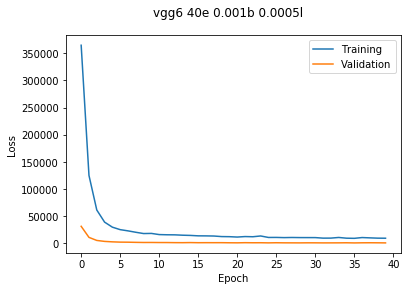

In [16]:
import time

TrainingOutputs    = []
ValidationOutputs  = []
AccuracyList       = []

# Launch the graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 
    
    print("Training...")
    print()
    start_time = time.time()
    for i in range(EPOCHS):
        X_train_epoch, y_train_epoch = shuffle(X_train_prep, y_train)        
        
        for offset in range(0, n_train, BATCH_SIZE):            
            batch_x, batch_y      = X_train_epoch[offset:offset+BATCH_SIZE], y_train_epoch[offset:offset+BATCH_SIZE]
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})            
        
        total_train_loss, avg_train_accuracy = Evaluate(X_train_epoch, y_train_epoch)        
        TrainingOutputs.append(total_train_loss)
        total_valid_loss, avg_valid_accuracy = Evaluate(X_valid_prep, y_valid)    
        ValidationOutputs.append(total_valid_loss)
        
        AccuracyString = 'Accuracy for epoch {0}: {1:5.2f}% with loss: {2:8.2f}'.format(i, 100*avg_valid_accuracy, total_valid_loss)
        AccuracyList.append(AccuracyString)
        print(AccuracyString)
    
    print("Time elapsed: {0:5.2f}".format(time.time()-start_time))
    saver.save(sess, './vgg6_40')
    print("Model saved")
    
PlotLearningCurve("Loss", TrainingOutputs, ValidationOutputs, '{}.jpg'.format(ModelName), ModelName)
with open('{}.txt'.format(ModelName), 'w') as Outfile:
    for each in AccuracyList:
        Outfile.write(each)
        Outfile.write('\n')

In [17]:
def Evaluate2(X_samples, y_labels):
    n_samples      = len(y_labels)
    total_loss     = 0
    total_accuracy = 0
    for offset in range(0, n_samples, BATCH_SIZE):
        batch_x, batch_y = X_samples[offset:offset+BATCH_SIZE], y_labels[offset:offset+BATCH_SIZE]        
        loss, accuracy   = sess.run([cost, accuracy_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})            
        total_loss     += (loss     * len(batch_y))
        total_accuracy += (accuracy * len(batch_y))
        print(accuracy)
    return total_loss, total_accuracy/n_samples

X_test_prep = np.zeros((n_test, *image_shape), dtype=np.float64)
for i in range(n_test):
    X_test_prep[i] = NormalizeImg(GeneralEqualizeHist(X_test[i,...], ApplyGrayScale=False))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 
    saver = tf.train.import_meta_graph('./vgg6_40.meta')
    saver.restore(sess, "./vgg6_40")
    
    print("Test...")
    print()
    
    X_shuffle, y_shuffle = shuffle(X_train_prep, y_train) 
    total_test_loss, avg_test_accuracy = Evaluate(X_shuffle, y_shuffle)             
    AccuracyString = 'Accuracy for test set: {0:5.2f}% with loss: {1:8.2f}'.format(100*avg_test_accuracy, total_test_loss)

print(AccuracyString)

Test...

Accuracy for test set: 99.73% with loss:  9597.47


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

22: Bumpy road
 4: Speed limit (70km/h)
11: Right-of-way at the next intersection
25: Road work
 0: Speed limit (20km/h)


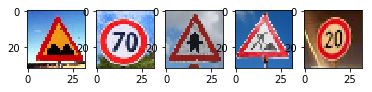

In [30]:
newsign_file   = 'newsign.p'
    
with open(newsign_file, mode='rb') as f:
    NewSign = pickle.load(f)
    
NewImages = NewSign['features']
NewLabels = NewSign['labels']

for i, each in enumerate(NewImages):
  plt.subplot(1,5,i+1)
  plt.imshow(each)
  WhichClass = NewLabels[i]
  print('{0:2}: {1}'.format(WhichClass, GetLabelString(WhichClass)))
plt.savefig('Processed_NewSigns')

    
### References
# All images cropped and resized to (32,32,3) RGB. Images below used under fair-use policy for udacity assignment

# 22.jpeg from https://www.icis.com/resources/news/2017/03/06/10085264/europe-methanol-spot-high-as-some-see-bumpy-road-ahead/

# 4.jpeg  from https://medium.com/@waleedka/traffic-sign-recognition-with-tensorflow-629dffc391a6

# 11.jpeg from http://bicyclegermany.com/

# 25.jpeg from http://www.rgbstock.com/

# 0.jpeg  from http://tinyletter.com/hamishjohnappleby/letters/happy-new-year-leipzig-germany-2016

In [20]:
# Process new images by 1) Equalize Histogram, and 2) Normalize

NewImagesPost = np.zeros((len(NewLabels), *image_shape), dtype=np.float64)

for i in range(len(NewLabels)):    
    NewImagesPost[i] = NormalizeImg(GeneralEqualizeHist(NewImages[i], ApplyGrayScale=False))

### Predict the Sign Type for Each Image

In [36]:
prediction = tf.argmax(logits, 1)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./vgg6.meta')
    saver.restore(sess, "./vgg6")
    guess = sess.run([prediction], feed_dict={x:NewImagesPost, y:NewLabels, keep_prob:1.})
    Accuracy = Evaluate(NewImagesPost, NewLabels)
    print(guess, Accuracy)

print(NewLabels)    

[array([14,  4, 11, 25,  0])] (6.820867657661438, 0.80000001192092896)
[22, 4, 11, 25, 0]


### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [37]:
predict_prob = tf.nn.softmax(logits)
top5_tf      = tf.nn.top_k(predict_prob, k = 5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./vgg6_40.meta')
    saver.restore(sess, "./vgg6_40")
    top5  = sess.run([top5_tf], feed_dict={x:NewImagesPost, y:NewLabels, keep_prob:1.})    
    

In [38]:
def GetPercentages(top_k, Position):
    return ['{0:5.2f}%'.format(each*100) for each in top_k[0][0][Position]]

def GetClasses(top_k, Position):
    return [each for each in top_k[0][1][Position]]

def GetTopKSoftmax(kSoftmax):
    for i in range(5): # 5 images
        print(NewLabels[i], ':', GetLabelString(NewLabels[i]))
        PctArray  = GetPercentages(top5,i)
        PctLabels = GetClasses(top5,i)
        for j in range(kSoftmax):
            print('{} for {}: {}'.format(PctArray[j], PctLabels[j], GetLabelString(PctLabels[j])))        
        print()
        
GetTopKSoftmax(5)

22 : Bumpy road
26.42% for 14: Stop
24.32% for 17: No entry
20.75% for 26: Traffic signals
 6.12% for 25: Road work
 4.21% for 22: Bumpy road

4 : Speed limit (70km/h)
100.00% for 4: Speed limit (70km/h)
 0.00% for 24: Road narrows on the right
 0.00% for 26: Traffic signals
 0.00% for 0: Speed limit (20km/h)
 0.00% for 1: Speed limit (30km/h)

11 : Right-of-way at the next intersection
99.99% for 11: Right-of-way at the next intersection
 0.00% for 42: End of no passing by vehicles over 3.5 metric tons
 0.00% for 30: Beware of ice/snow
 0.00% for 6: End of speed limit (80km/h)
 0.00% for 27: Pedestrians

25 : Road work
99.88% for 25: Road work
 0.11% for 33: Turn right ahead
 0.01% for 26: Traffic signals
 0.00% for 30: Beware of ice/snow
 0.00% for 29: Bicycles crossing

0 : Speed limit (20km/h)
99.96% for 0: Speed limit (20km/h)
 0.01% for 37: Go straight or left
 0.01% for 35: Ahead only
 0.00% for 23: Slippery road
 0.00% for 28: Children crossing



### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.